In [6]:
import io
import pandas as pd
from bs4 import BeautifulSoup
import requests
import csv
from matplotlib import pyplot as plt

In [3]:
def get_corona_data():
    url="https://www.worldometers.info/coronavirus/"
    # Make a GET request to fetch the raw HTML content
    html_content = requests.get(url).text
    # Parse the html content
    soup = BeautifulSoup(html_content, "lxml")
    gdp_table = soup.find("table", id = "main_table_countries_today")
    gdp_table_data = gdp_table.tbody.find_all("tr")

    # Getting all countries names
    dicts = {}
    for i in range(len(gdp_table_data)):
        try:
            key = (gdp_table_data[i].find_all('a', href=True)[0].string)
        except:
            key = (gdp_table_data[i].find_all('td')[0].string)

        value = [j.string for j in gdp_table_data[i].find_all('td')]
        dicts[key] = value
    live_data= pd.DataFrame(dicts).drop(0).T.iloc[:,:8]
    live_data.columns = ["Total Cases","New Cases", "Total Deaths", "New Deaths", "Total Recovered","Active","Serious Critical",
"Tot Cases/1M pop"]
    live_data.index.name = 'Country'
    
    ### your file is saved here
    live_data.iloc[:,:5].to_csv("base_data.csv")

In [4]:
get_corona_data()

<BarContainer object of 5 artists>

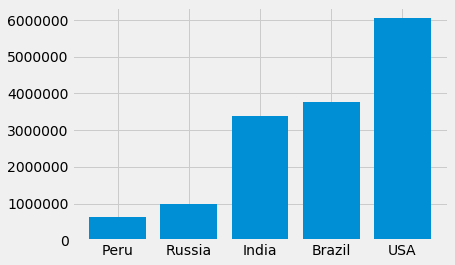

In [36]:
datafile=open('base_data.csv')
data=csv.reader(datafile)
data=list(data)
countries=[]
cases=[]
i=2
while(i<7):
    country=data[i][1]
    countries.append(country)
    case_count=data[i][2]
    case_count=case_count.replace(',','')
    case_count=int(case_count)
    cases.append(case_count)
    i=i+1
cases.sort()
countries.reverse()
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.bar(countries,cases)